In [18]:
import sys
import matplotlib.pyplot as plt
import numpy as np

import sklearn
import sklearn.datasets as datasets
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))

np.random.seed(42)

Python: 3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)]
Scikit-learn: 1.6.0
NumPy: 1.26.4


## 1. Visualise MNIST digit data

In [19]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print (n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)


10
n_features: 784
n_samples: 10000


In [20]:
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
Y_int=Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]


Class: 3


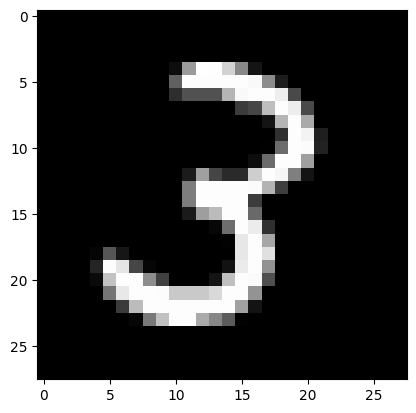

In [ ]:
##**** Show an exemple of MNIST data ***##
p=1829
plt.imshow(X_digits[p].reshape((28,28)), cmap='gray')
print("Class: %s" % Y_digits[p])

X is images of numbers.

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


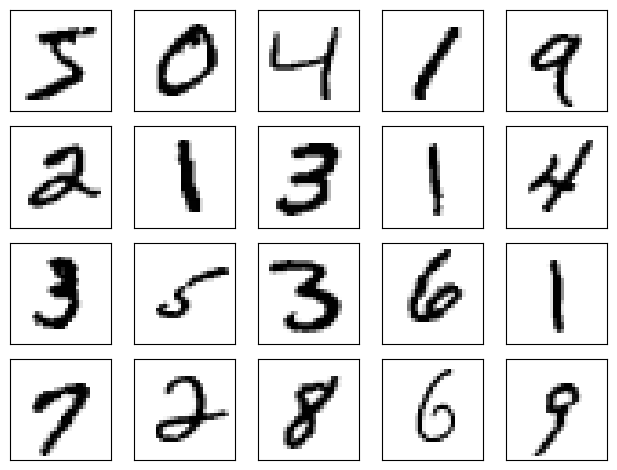

In [27]:
##**** Display twenty images, simultaneously, in grey-scale level and their associated label ***##

plt.rc("image", cmap="binary") 
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

X_digits is an image of a number.
Y_digits is the number.

## 2. Apply K-Means

There are 10 classes: from 0 to 9.

The kmeans cost function is:
- Calculate for each cluster the sum of the squared distances between individuals and the mean m
- Sum of this quantity over all clusters

******** KMEANS completed ********


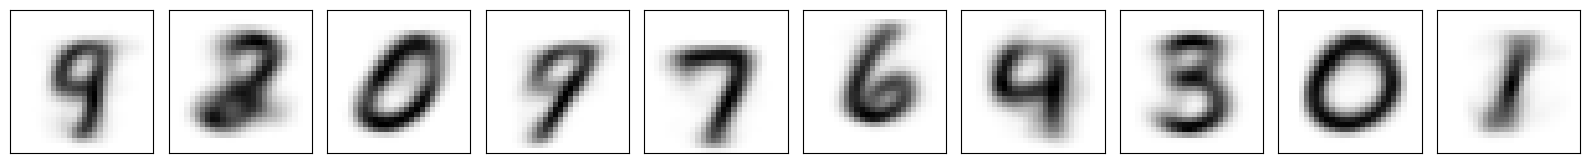

In [53]:
##**** Apply K-means with K=10 ***##
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++") #k-means++ is the best
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,n_clusters,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

##**** Analyze finely the obtained centroids ***##

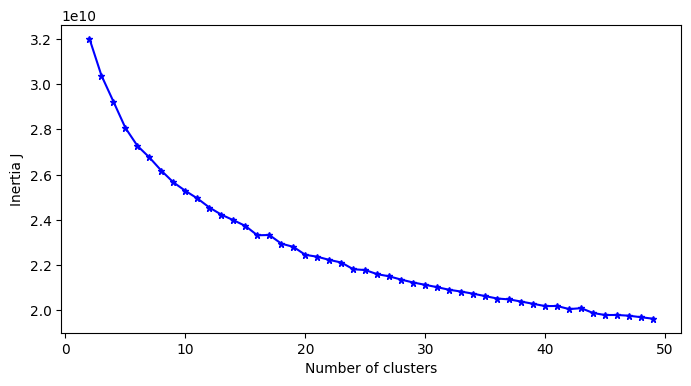

In [56]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 50) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,50)
    for k in K_range:
        model=KMeans(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia J')
    plt.show()
    
plot_inertia(X_digits)   

The elbow method is not obvious if you plot until 12 but it's better when you plot until 50.
The "best" number of cluster may be 7 because some numbers are confused: 0=6, 7=1, 3=8

## 3. Find the best number K of clusters

### With silhouette

For k = 2 , Average Silhouette Score : 0.0899
For k = 3 , Average Silhouette Score : 0.0585
For k = 4 , Average Silhouette Score : 0.0634
For k = 5 , Average Silhouette Score : 0.072
For k = 6 , Average Silhouette Score : 0.0695
For k = 7 , Average Silhouette Score : 0.0706
For k = 8 , Average Silhouette Score : 0.0602
For k = 9 , Average Silhouette Score : 0.0553
For k = 10 , Average Silhouette Score : 0.0622
For k = 11 , Average Silhouette Score : 0.063
For k = 12 , Average Silhouette Score : 0.0631


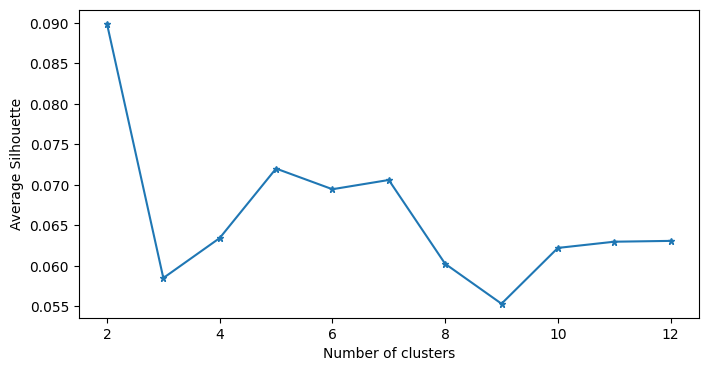

In [ ]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMeans(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.show()

plot_silhouette(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***##

The "best" number of cluster may be 7 because some numbers are mixed up: 0=6, 7=1, 3=8

### With Calinski-Harabasz

For k = 2, Calinski-Harabasz Score: 717.49
For k = 3, Calinski-Harabasz Score: 645.42
For k = 4, Calinski-Harabasz Score: 581.24
For k = 5, Calinski-Harabasz Score: 555.52
For k = 6, Calinski-Harabasz Score: 515.19
For k = 7, Calinski-Harabasz Score: 475.57
For k = 8, Calinski-Harabasz Score: 443.98
For k = 9, Calinski-Harabasz Score: 420.69
For k = 10, Calinski-Harabasz Score: 397.91
For k = 11, Calinski-Harabasz Score: 378.94
For k = 12, Calinski-Harabasz Score: 360.71


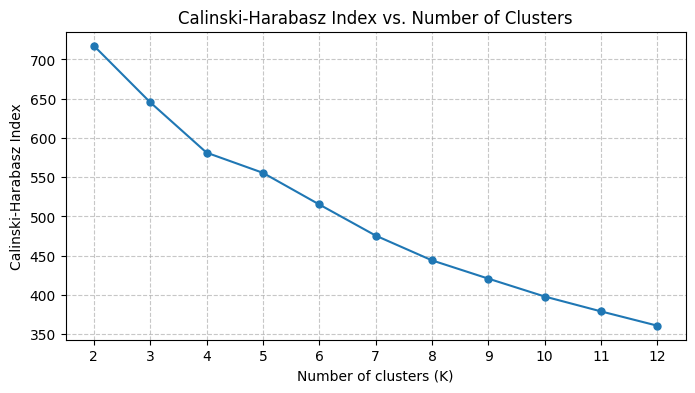


Optimal number of clusters according to Calinski-Harabasz: 2


In [ ]:
from sklearn.metrics import calinski_harabasz_score

def plot_calinski_harabasz(X_digits):
    ch_scores = []
    K_range = range(2, 13)
    
    for k in K_range:
        clusterer = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X_digits)
        ch_score = calinski_harabasz_score(X_digits, cluster_labels)
        print(f"For k = {k}, Calinski-Harabasz Score: {round(ch_score, 2)}")
        ch_scores.append(ch_score)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K_range, ch_scores, marker='o', markersize=5, linestyle='-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Calinski-Harabasz Index')
    plt.title('Calinski-Harabasz Index vs. Number of Clusters')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(K_range)
    plt.show()
    
    # Find the optimal K (highest CH score)
    optimal_k = K_range[np.argmax(ch_scores)]
    print(f"\nOptimal number of clusters according to Calinski-Harabasz: {optimal_k}")
    
plot_calinski_harabasz(X_digits)

### With Davies-Bouldin

The Davies-Bouldin index differs from the other metrics:

- Lower values indicate better clustering (unlike silhouette and Calinski-Harabasz where higher is better)
- It measures the average similarity between clusters, where similarity is the ratio of within-cluster distances to between-cluster distances
- The optimal number of clusters is where this index reaches its minimum value

For k = 2, Davies-Bouldin Score: 3.6601
For k = 3, Davies-Bouldin Score: 3.2262
For k = 4, Davies-Bouldin Score: 3.1154
For k = 5, Davies-Bouldin Score: 2.8785
For k = 6, Davies-Bouldin Score: 2.8756
For k = 7, Davies-Bouldin Score: 2.9233
For k = 8, Davies-Bouldin Score: 2.9047
For k = 9, Davies-Bouldin Score: 2.825
For k = 10, Davies-Bouldin Score: 2.8209
For k = 11, Davies-Bouldin Score: 2.8198
For k = 12, Davies-Bouldin Score: 2.7664
For k = 13, Davies-Bouldin Score: 2.7516
For k = 14, Davies-Bouldin Score: 2.7646
For k = 15, Davies-Bouldin Score: 2.7133
For k = 16, Davies-Bouldin Score: 2.6621
For k = 17, Davies-Bouldin Score: 2.681
For k = 18, Davies-Bouldin Score: 2.6742
For k = 19, Davies-Bouldin Score: 2.6252


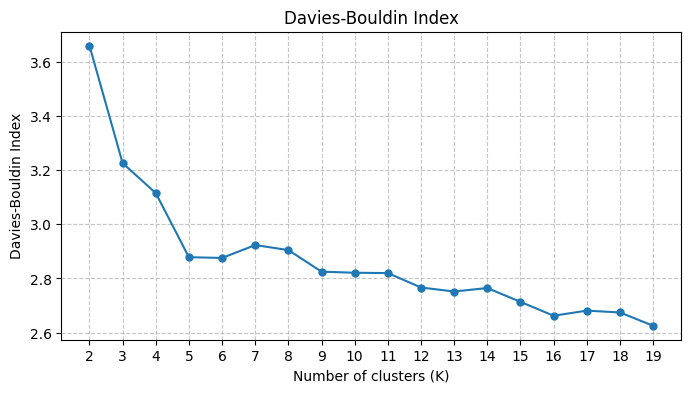


Optimal number of clusters according to Davies-Bouldin: 19


In [ ]:
from sklearn.metrics import davies_bouldin_score

def plot_davies_bouldin(X_digits):
    db_scores = []
    K_range = range(2, 20)
    
    for k in K_range:
        clusterer = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X_digits)
        db_score = davies_bouldin_score(X_digits, cluster_labels)
        print(f"For k = {k}, Davies-Bouldin Score: {round(db_score, 4)}")
        db_scores.append(db_score)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K_range, db_scores, marker='o', markersize=5, linestyle='-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(K_range)
    plt.show()
    
    # Find the optimal K (lowest DB score)
    optimal_k = K_range[np.argmin(db_scores)]
    print(f"\nOptimal number of clusters according to Davies-Bouldin: {optimal_k}")
    
plot_davies_bouldin(X_digits)

The metrics disagree for MNIST:
- Silhouette (optimal K=5): Focuses on how well-separated and compact clusters are. For MNIST, some digits (like 0, 6, 9) or (1, 7) might be naturally grouped together in feature space, making 5 clusters appear optimal.
- Calinski-Harabasz (optimal K=2): Heavily favors compact, well-separated clusters. It might be seeing the MNIST dataset primarily divided into two major groups (perhaps digits with loops vs. straight-line digits).
- Davies-Bouldin (optimal K=19): Looks at the worst-case scenario of cluster separation. Suggesting 19 clusters means it's finding that many distinct groupings in the data.

For MNIST, we know there are 10 digit classes, so ideally K=10. However, unsupervised clustering doesn't always align perfectly with the supervised classes.

## 4. Evaluate the quality of the clustering based on the original labels using different tools

ugly version:
[[   4   11  425    1    0   31   12   32  482    3]
 [  14    9    0    1    1    1    0    2    0 1099]
 [   4  648   11    2    8   47   30   51    4  186]
 [  60  143   39   13    8   11    5  686    2   65]
 [ 279    2    0  239    2   15  408    1    0   34]
 [ 164    2  109   51    0   26   21  270   11  209]
 [   2    4   12    0    0  790  107    4   12   83]
 [  90    5    3  359  495    0   60    1    0   57]
 [ 140  326    9   43    0   15   33  242    4  132]
 [ 385    1    2  287   26    2  241   16    4   14]]
beautiful version:


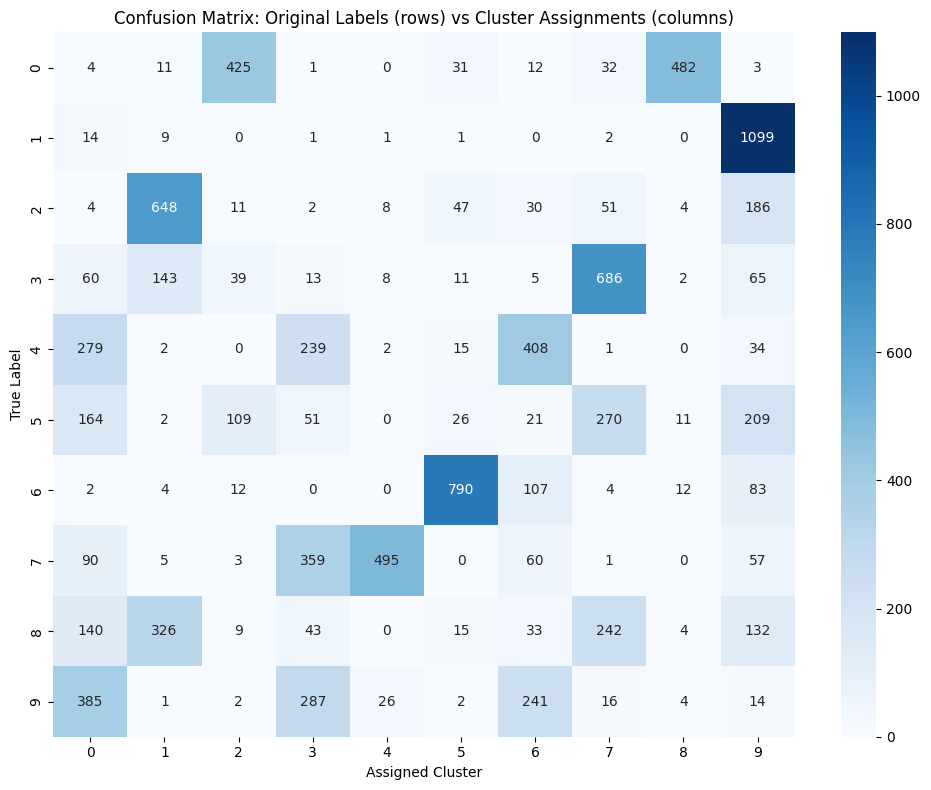

Adjusted Rand Index: 0.3544
Normalized Mutual Information: 0.4796
Homogeneity Score: 0.4722
Completeness Score: 0.4872
V-measure: 0.4796


In [ ]:
import seaborn as sns

##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
conf_matrix=sklearn.metrics.confusion_matrix(Y_int,clusters)
print("ugly version:")
print(conf_matrix)

print("beautiful version:")
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix: Original Labels (rows) vs Cluster Assignments (columns)')
plt.ylabel('True Label')
plt.xlabel('Assigned Cluster')
plt.tight_layout()
plt.show()

# Print some additional metrics
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(Y_int, clusters):.4f}")
print(f"Normalized Mutual Information: {metrics.normalized_mutual_info_score(Y_int, clusters):.4f}")
print(f"Homogeneity Score: {metrics.homogeneity_score(Y_int, clusters):.4f}")
print(f"Completeness Score: {metrics.completeness_score(Y_int, clusters):.4f}")
print(f"V-measure: {metrics.v_measure_score(Y_int, clusters):.4f}")

At this state, we've not fixed columns accordingly to logic (frist colum = 0, second colum = 1), hence the result.

Key observations:

- Digit 0 (first row): Heavily concentrated in cluster 8 (795 instances), but with some dispersion across other clusters.
- Digit 1 (second row): Split mainly between clusters 4 and 5 (538 and 578 instances).
- Digit 2 (third row): Most concentrated in cluster 1 (638 instances), but still quite fragmented.
- Digit 3 (fourth row): Mostly in cluster 7 (703 instances).
- Digit 4 (fifth row): Highly dispersed across clusters 0, 3, 6, and 9 with no clear dominant cluster.
- Digit 5 (sixth row): Split mainly between clusters 4 and 7 (323 and 341 instances).
- Digit 6 (seventh row): Most concentrated in cluster 2 (711 instances).
- Digit 7 (eighth row): Divided mainly between clusters 0 and 3 (382 and 365 instances).
- Digit 8 (ninth row): Widely distributed with largest concentration in cluster 1 (360 instances).
- Digit 9 (tenth row): Very fragmented across clusters 0, 3, and 9.

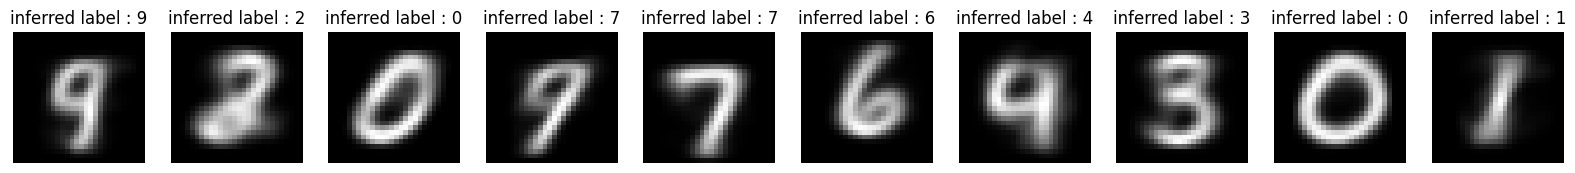

In [ ]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

# kmeans = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++") #k-means++ is the best
# model=kmeans.fit(X_digits)

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

In [70]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

Entropies= [7.04053639 7.04838641 6.41345896 6.90374726 6.29156914 6.84374995
 6.82110747 7.17395832 6.25190388 7.54009032]
Average Entropy = 6.833


Cluster  8  presents the lowest entropy value = 6.2519038831658875


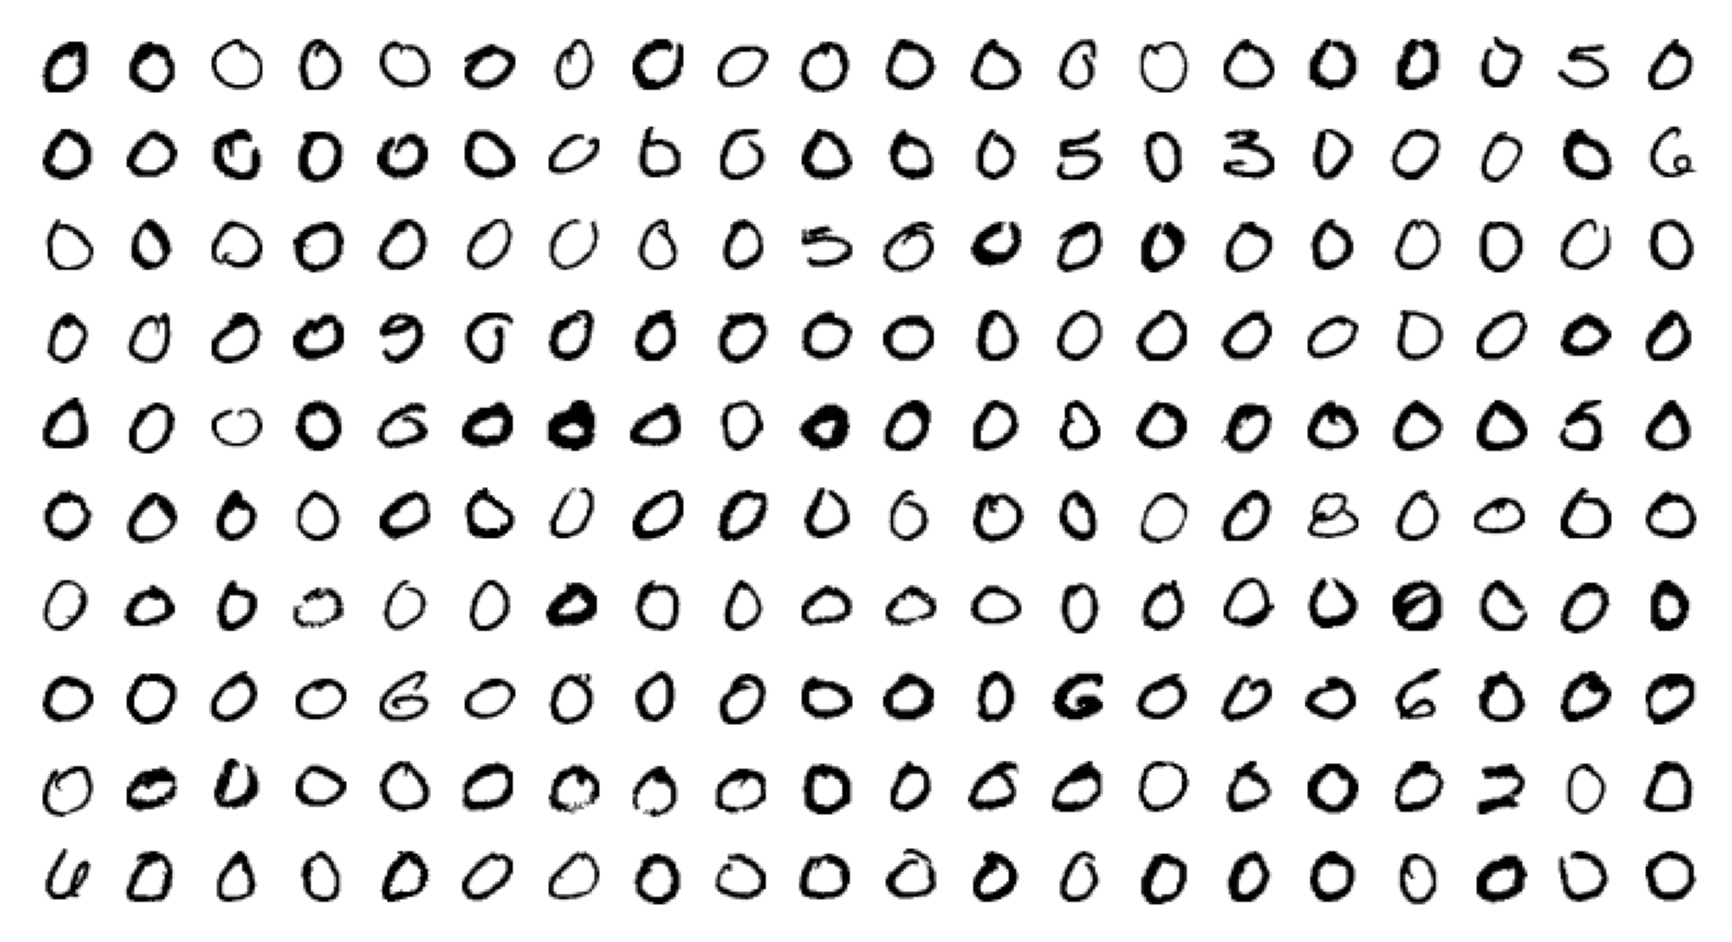

In [71]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

Cluster 8 is the number 0.

Cluster  9  presents the highest entropy value = 7.540090320145325


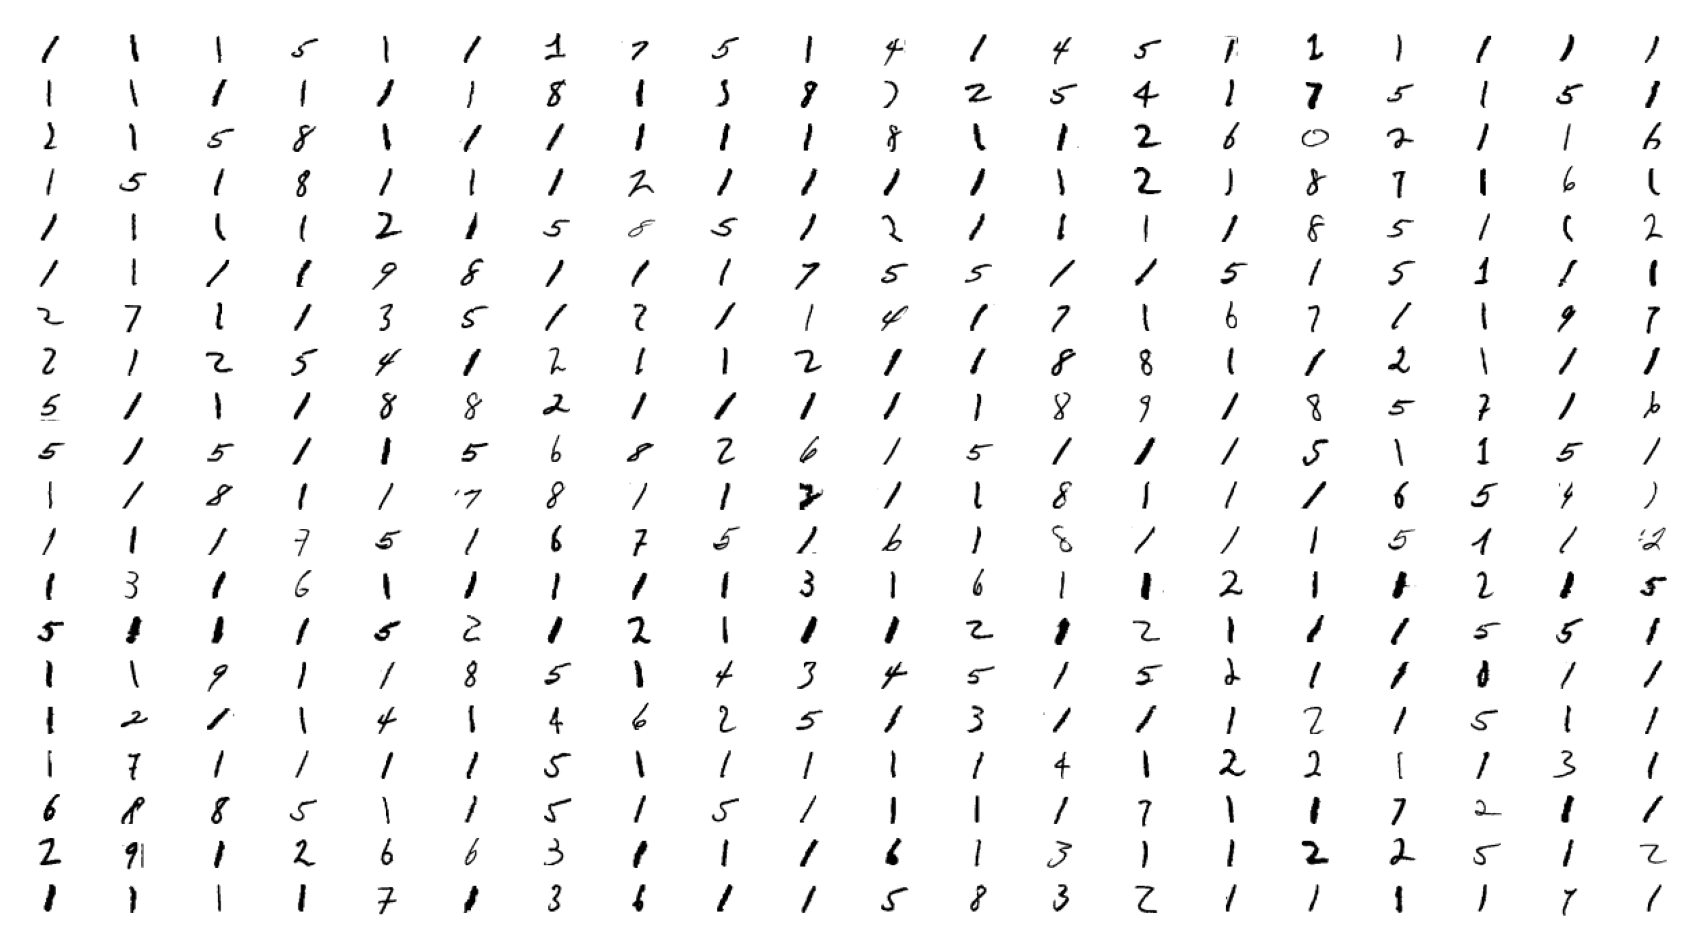

In [72]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(400):
 plt.subplot(20,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

Cluster 9 is the number 1, the kmeans is not very good with this number.

For k = 2, Good distribution of: 20.93%
For k = 3, Good distribution of: 30.04%
For k = 4, Good distribution of: 37.93%
For k = 5, Good distribution of: 45.58%
For k = 6, Good distribution of: 47.49%
For k = 7, Good distribution of: 53.04%
For k = 8, Good distribution of: 49.44%
For k = 9, Good distribution of: 52.86%
For k = 10, Good distribution of: 63.9%
For k = 11, Good distribution of: 61.0%
For k = 12, Good distribution of: 60.9%
For k = 13, Good distribution of: 64.68%
For k = 14, Good distribution of: 62.87%
For k = 15, Good distribution of: 67.82%


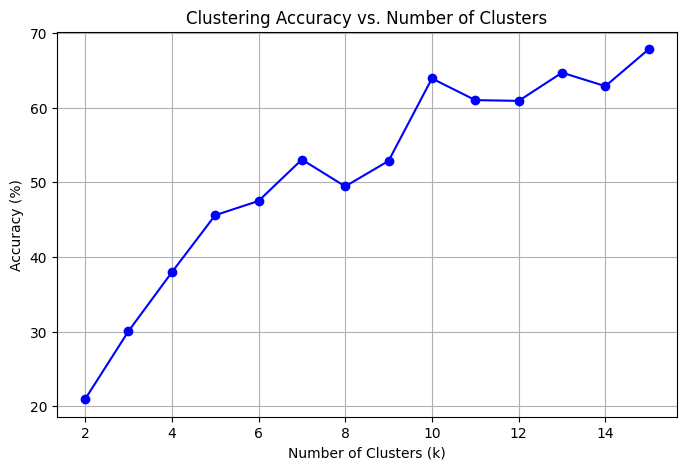

In [80]:
# Test different number of clusters
clu = list(range(2, 16))  # k values from 2 to 15
accuracies = []  # Store accuracy values

for n_clust in clu:
    estimator = KMeans(n_clusters=n_clust, random_state=42, init="k-means++", n_init=4)
    estimator.fit(X_digits)

    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    # Compute accuracy
    acc = metrics.accuracy_score(Y_int, predicted_Y) * 100
    accuracies.append(acc)

    print(f"For k = {n_clust}, Good distribution of: {round(acc, 2)}%")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(clu, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Accuracy (%)")
plt.title("Clustering Accuracy vs. Number of Clusters")
plt.grid(True)
plt.show()

The accuracy is better when you increase the number of cluster even if K-Means is forced to create more clusters than there are actual digit classes beacause:
- Digits in MNIST are not evenly distributed; some digits (like "1" and "7") may have multiple distinct styles. More clusters allow the model to capture these variations.
- Certain digits might be broken into subgroups (e.g., "8" can be split into "rounded 8" and "narrow 8").
- Some misclassified clusters may get split, reducing confusion.

# K Medoids

In [82]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp310-cp310-macosx_10_9_universal2.whl size=808004 sha256=9a1691e6006625f68e382a1ca49a4ce11e934ef131b5adf1921aa345c545458f
  Stored in directory: /Users/hemmalizee/Library/Caches/pip/wheels/60/e1/7f/881b5af199acf453d55d49d38e227d291fe5b562099ac29a68
Successfully built scikit-learn-extra

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Let's start with 10 clusters.

******** KMEDOIDS completed ********


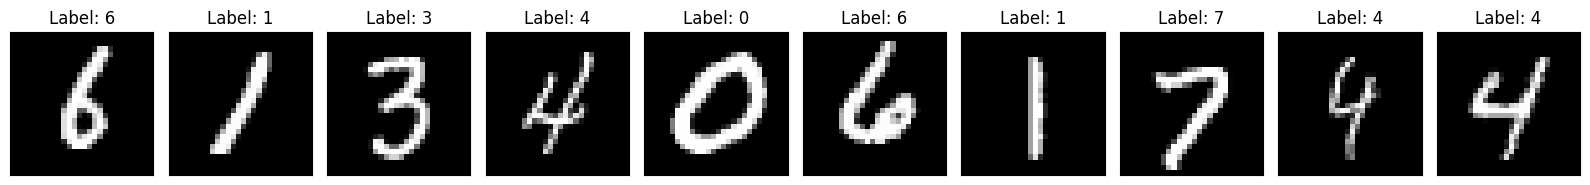

In [86]:
from sklearn_extra.cluster import KMedoids

# Define number of clusters
n_clusters = 10

# Fit K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, init="k-medoids++")  
model = kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

# Get medoid digits and their real labels
medoid_indices = model.medoid_indices_  # Indices of medoid images
medoid_digits = X_digits[medoid_indices]  # Actual medoid images
medoid_labels = Y_int[medoid_indices]  # Retrieve real labels

# Unsupervised classification of data
clusters = model.predict(X_digits)

##**** Visualize the medoid digits with real labels ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2, n_clusters, i+1)
    plt.imshow(medoid_digits[i].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Label: {medoid_labels[i]}", fontsize=12)

plt.tight_layout()
plt.show()


Let's try with 20 clusters. We get most numbers, the only one missing is number 5. It's the most difficult one to find. 5 appears when we put 24 classes.

******** KMEDOIDS completed ********


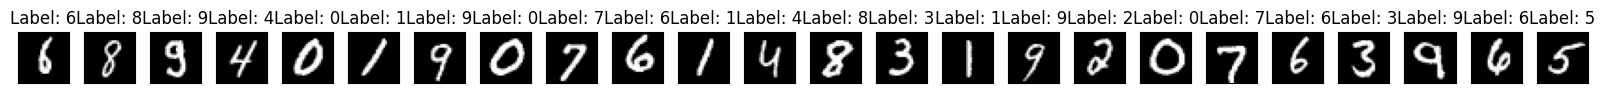

In [94]:
# Define number of clusters
n_clusters = 24

# Fit K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, init="k-medoids++")  
model = kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

# Get medoid digits and their real labels
medoid_indices = model.medoid_indices_  # Indices of medoid images
medoid_digits = X_digits[medoid_indices]  # Actual medoid images
medoid_labels = Y_int[medoid_indices]  # Retrieve real labels

# Unsupervised classification of data
clusters = model.predict(X_digits)

##**** Visualize the medoid digits with real labels ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2, n_clusters, i+1)
    plt.imshow(medoid_digits[i].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Label: {medoid_labels[i]}", fontsize=12)

plt.tight_layout()
plt.show()

It's faster than kmeans.

Sorting the medoids by their real labels (0-9) will make the visualization clearer.

******** KMEDOIDS completed ********


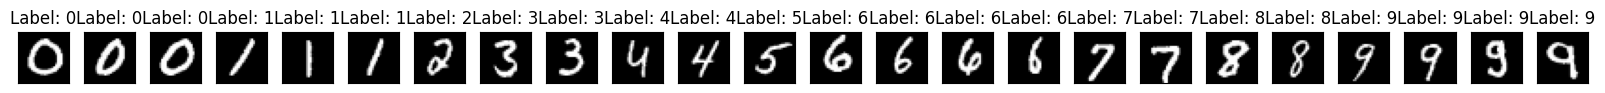

In [96]:
# Define number of clusters
n_clusters = 24

# Fit K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, init="k-medoids++")  
model = kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

# Get medoid digits and their real labels
medoid_indices = model.medoid_indices_  # Indices of medoid images
medoid_digits = X_digits[medoid_indices]  # Actual medoid images
medoid_labels = Y_int[medoid_indices]  # Retrieve real labels

# Sort medoids by label (0 → 9)
sorted_indices = np.argsort(medoid_labels)
medoid_digits = medoid_digits[sorted_indices]
medoid_labels = medoid_labels[sorted_indices]

##**** Visualize the medoid digits with sorted labels ***##
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2, n_clusters, i+1)
    plt.imshow(medoid_digits[i].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Label: {medoid_labels[i]}", fontsize=12)

plt.tight_layout()
plt.show()

We can see what numbers come more often: there are many ways to write a 0, a 6, a 9. The 1 depends on how the bar is tilted.